In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset_LotkaVolterra import *

In [26]:
# Example parameters and initial conditions
num_samples = 1000 # Number of samples to generate
parameters = [1.5, 1, 1, 3]  # [alpha, beta, delta, gamma]
total_time = 20.0
dt = 0.01
seed = 0
config = {'seed': seed,
          'x_init_low': [5, 5], 'x_init_high': [8, 8], 
          'parameters_low': [0.5, 0.1, 0.1, 0.5], 
          'parameters_high': [2.0, 0.5, 0.5, 1.0],
          'data_sparsity': 0.03, 'noise_snr': [15, 15]}

# Generate Data
dataset = LotkaVolterraDataset(num_samples, total_time, dt, config)
# get dataloaders
train_loader , valid_loader, test_loader = get_dataloader_LotkaVolterra(dataset, seed=seed, nfold=0, batch_size=32)

Number of samples: 1000
Shape of sample data: torch.Size([60, 2])
The parameters used: tensor([1.6521, 0.1984, 0.2470, 0.5791])
The initial conditions used: tensor([5.0088, 6.0116])


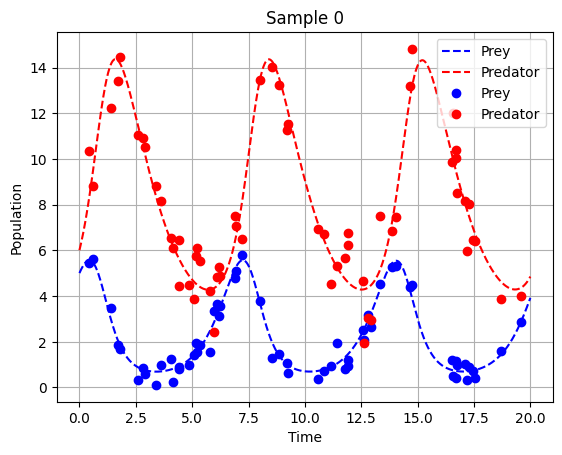

In [44]:
# Get a sample from the train dataset
batch = next(iter(train_loader))  # Preload the first batch to ensure the dataset is ready
sample = {k: v[0] for k, v in batch.items()}

# print the number of samples and the shape of the data
print(f"Number of samples: {len(dataset)}")
print(f"Shape of sample data: {sample['x'].shape}")
print(f"The parameters used: {sample['parameters']}")
print(f"The initial conditions used: {sample['x_init']}")

t_real, x1_real, x2_real = LVmodel(sample['x_init'], total_time, dt, sample['parameters'])

# Visualize one sample
plt.plot(t_real, x1_real, label="Prey", linestyle='--', color='blue')
plt.plot(t_real, x2_real, label="Predator", linestyle='--', color='red')
plt.plot(sample['time'], sample['x'][:, 0], label="Prey", marker='o', linestyle='None', color='blue')
plt.plot(sample['time'], sample['x'][:, 1], label="Predator", marker='o', linestyle='None', color='red')
plt.title("Sample 0")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()